## SETUP inicial
Aqui importamos as principais bibliotecas e definimos algumas configurações para a exploração dos dados. 
Vou utilizar um random state fixo para garantir a reprodutibilidade do modelo

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.4f}".format)

RANDOM_STATE = 42
DATA_PATH = "../data/raw/dataset.csv"


### Verificando a estrutura do dataset

In [10]:
df = pd.read_csv(DATA_PATH)
df.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0000,0.0000,0.0000,0.0000,124.5400,3277.0000,51.9800,NaN,500.0000,153.0000,NaN,299.0000,73.2600,1024.0000,26.9800,162.0000,3000.0000,72.0000,45.0000,8,1279.0000,63.0000,77.6700,492.8400,12.0000,845.0000,NaN,12.0000,16.0000,500.0000,22.0000,0.1338,18.0000,NaN,NaN,0.0000,16.0000,220.8400,348.0000,9.0000,9.5700,33.0000,19.0000,11.0000,512.8200,36.0000,0.0000,16.0000,0.0000,159.2800,379.0000,53.9700,3380.0000,500.0000,159.2800,159.2800,45,369.0000,95.5400,-0.0305,0.0000,2508.0000,159.2800,0,1303.7900,8.0000,-69.0000,16.0000,156.3800,7.5200,0.0000,151.0000,0.0000,3.0000,477.8400,173.0600,0.0000,3.0000
1,2,201407,0,64.0000,0.0000,2.0000,1.0000,47.9200,2443.0000,84.7200,NaN,1000.0000,649.0000,NaN,224.0000,38.5300,NaN,NaN,84.0000,NaN,50.0000,18.0000,12,1063.0000,31.0000,177.3900,335.4400,9.0000,NaN,842.0000,10.0000,NaN,1000.0000,14.0000,0.1338,13.0000,NaN,NaN,NaN,NaN,338.9000,179.0000,5.0000,NaN,NaN,19.0000,9.0000,269.7100,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,1000.0000,2000.0000,NaN,NaN,60,228.0000,97.7300,0.3573,NaN,836.0000,NaN,0,1486.2600,24.0000,NaN,NaN,707.8400,NaN,NaN,187.0000,NaN,NaN,NaN,184.6900,54.0000,NaN
2,3,201405,0,99.0000,2.0000,2.0000,2.0000,80.3800,1824.0000,26.6300,NaN,1893.3500,346.0000,29.9800,106.0000,NaN,NaN,73.5500,8.0000,NaN,3.0000,2.0000,12,116.0000,4.0000,140.2500,362.7100,3.0000,NaN,597.0000,5.0000,NaN,1893.3500,NaN,0.1338,2.0000,NaN,59.9700,NaN,NaN,133.1700,NaN,4.0000,NaN,NaN,3.0000,12.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,294.2000,1893.3500,1893.3500,NaN,NaN,31,264.0000,294.5700,-0.4118,NaN,NaN,NaN,0,800.2700,18.0000,NaN,NaN,471.8600,NaN,NaN,96.0000,NaN,NaN,NaN,732.0000,121.9800,NaN
3,4,201412,0,0.0000,0.0000,0.0000,0.0000,10.5800,3796.0000,NaN,NaN,3000.0000,119.0000,NaN,NaN,NaN,1609.0000,NaN,36.0000,1500.0000,17.0000,11.0000,12,255.0000,14.0000,29.9900,74.0600,0.0000,1238.0000,NaN,0.0000,5.0000,3000.0000,12.0000,0.1338,3.0000,NaN,NaN,0.0000,-1.0000,NaN,NaN,5.0000,NaN,7.0000,NaN,6.0000,NaN,7.0000,0.0000,NaN,NaN,NaN,594.0000,NaN,3000.0000,7000.0000,287.3100,NaN,76,49.0000,NaN,0.7216,5.7500,NaN,287.3100,0,NaN,4.0000,-133.0000,NaN,119.9600,23.0000,0.0000,417.0000,0.0000,0.0000,NaN,NaN,0.0000,0.0000
4,5,201403,1,0.0000,0.0000,0.0000,0.0000,70.4600,437.0000,40.6900,10.9900,2000.0000,NaN,62.7800,NaN,NaN,288.0000,29.5800,NaN,NaN,NaN,0.0000,12,NaN,0.0000,NaN,493.2200,0.0000,43.0000,NaN,0.0000,-9.0000,2000.0000,0.0000,0.0906,0.0000,10.9900,313.9100,0.0000,-9.0000,326.8900,NaN,0.0000,0.0000,-9.0000,NaN,0.0000,NaN,-9.0000,NaN,-16.0000,0.0000,182.8900,288.0000,147.9400,2946.2900,2946.2900,182.8900,182.8900,38,332.0000,NaN,-0.2317,NaN,NaN,NaN,1,1457.7800,NaN,-272.0000,-16.0000,NaN,NaN,0.0000,75.0000,0.0000,0.0000,914.4500,NaN,NaN,0.0000


In [12]:
df['id'].nunique(), df.shape[0]

(10738, 10738)

In [13]:
df['y'].value_counts()
df['y'].value_counts(normalize=True)

y
0   0.7087
1   0.2913
Name: proportion, dtype: float64

### Validação de volume por safra
Aqui vemos que os dados por safra estão equilibrados e não temos nenhuma tendencia com o tempo

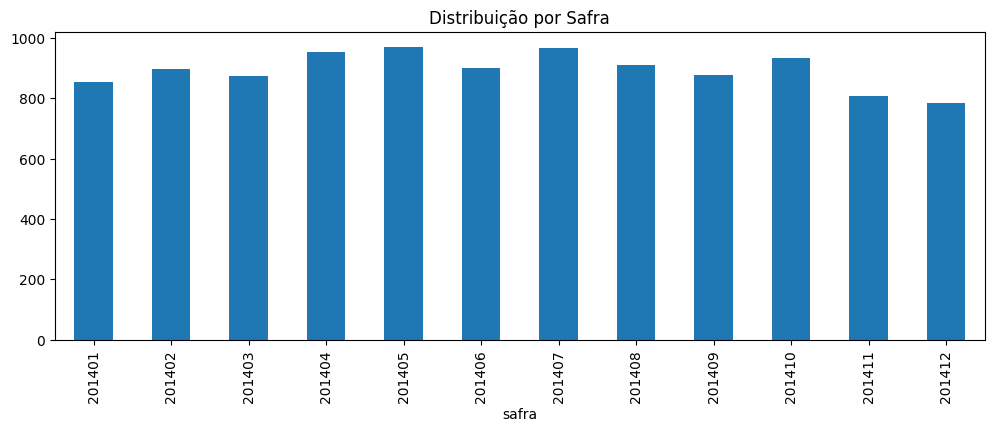

In [16]:
plt.figure(figsize=(12,4))
df['safra'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição por Safra")
plt.show()


### Verificação de valores nulos

In [24]:
missing = (
    df.isnull()
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)
missing.columns = ['variavel', 'missing_pct']
missing.head(5) #Alterando o head podemos ver mais variaveis


,variavel,missing_pct
0,VAR_62,0.7801
1,VAR_70,0.7691
2,VAR_61,0.7132
3,VAR_49,0.6795
4,VAR_36,0.6768


Variaveis com até 40% de valores nulos podemos pensar em aplicar um tratamento para esses valores. <br>
variaveis que tem mais de 40% de valores nulos são boas candidatas a drop. 

In [32]:
df.describe().T.head(5)

,count,mean,std,min,25%,50%,75%,max
id,10738.0000,5369.5000,3099.9379,1.0000,2685.2500,5369.5000,8053.7500,10738.0000
safra,10738.0000,201406.4235,3.3760,201401.0000,201404.0000,201406.0000,201409.0000,201412.0000
y,10738.0000,0.2913,0.4544,0.0000,0.0000,0.0000,1.0000,1.0000
VAR_1,10322.0000,32.9992,46.3677,0.0000,0.0000,16.0000,46.0000,208.0000
VAR_2,10322.0000,0.3723,1.2586,0.0000,0.0000,0.0000,0.0000,17.0000


Analisando algumas méticas das variáveis podemos ver que algumas tem o desvio padrão alto. podendo indicar outliers ou alta dispersão.

### Considerações

A variável target apresenta uma taxa de positivos de aproximadamente 30%, caracterizando uma distribuição assimétrica. Esse comportamento é esperado em bases de crédito, quando tentamos prever inadimplência por exemplo. Essa característica reforça a escolha de métricas como AUC, KS e Gini para a avaliação do desempenho do modelo, em detrimento de métricas como acurácia.

Foi observado também um comportamento relativamente constante da dados ao longo das safras disponíveis sem indicar tendencia, o que reforça a necessidade de uma separação temporal dos dados para o desenvolvimento e validação do modelo, mitigando riscos de vazamento de informação e outros problemas em uma situação real.

Por fim, identificou-se a presença de variáveis com alta taxa de valores ausentes. Essas variáveis serão tratadas por meio de técnicas de imputação ou, quando apropriado, descartadas na etapa de pré-processamento.
